## Preliminary exploratory plots examining what the data roughly looks like

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import psu_tools

from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

IOPATH0 = '/data/rbeutel/obs/PNW_obs_compiled.csv'
IOPATH = '/ocean/ghoeven/MOAD/Data/PNW_obs_compiled.csv'

In [2]:
dfObsPNW = pd.read_csv(IOPATH)

In [3]:
#print(dfObsPNW.columns)
lat = dfObsPNW["latitude (degrees_north)"]
lon = dfObsPNW["longitude (degrees_east)"]


Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #491 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included b

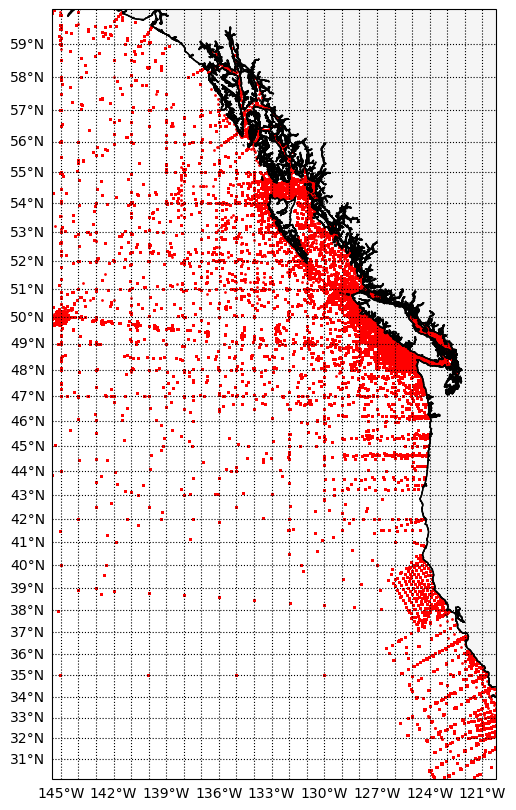

In [4]:
# Make plot area
xlim, ylim = [-145.5, -120.2], [30, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)
ax.scatter(lon, lat, transform=crs.PlateCarree(), color='red', s=1)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False



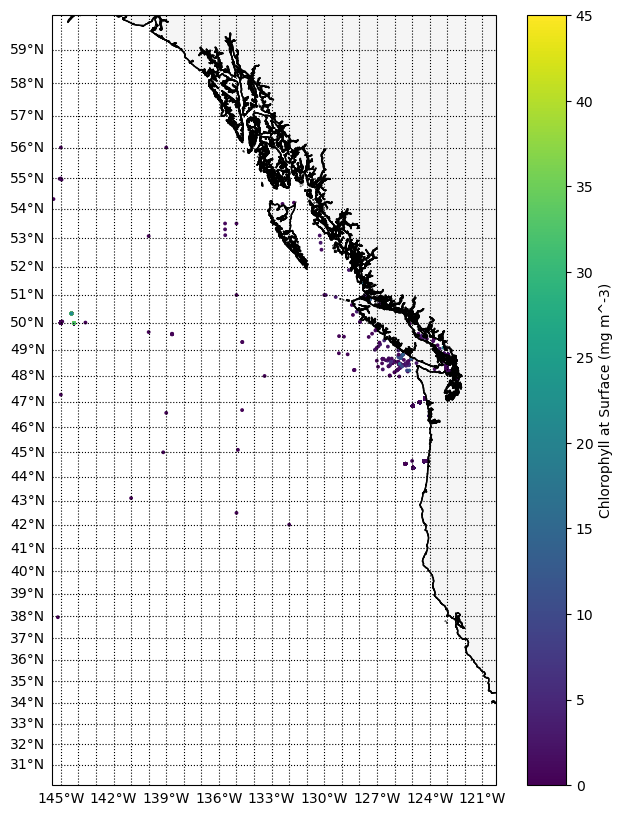

In [5]:
## Chlorophyll Map at 0m depth

inPlot = (-145.5 < lon) & (lon < -120.2) & (30 < lat) & (lat < 60)
selectObsPNW = dfObsPNW[inPlot]

at0m = selectObsPNW['depth (m)'] == 0.0

chl0m = selectObsPNW['Chl (mg m-3)'][at0m]
lon0m = selectObsPNW["longitude (degrees_east)"][at0m]
lat0m = selectObsPNW["latitude (degrees_north)"][at0m]

# Make plot area
xlim, ylim = [-145.5, -120.2], [30, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

sc = ax.scatter(lon0m, lat0m, transform=crs.PlateCarree(), c=chl0m, cmap='viridis', s=3, vmin=0, vmax=45)
# Add colorbar using the figure object, not the axes
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', label='Chlorophyll at Surface (mg m^-3)')


# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False


/tmp/ipykernel_3544174/2138402847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectObsPNW["month"] = pd.to_datetime(selectObsPNW["time"]).dt.month


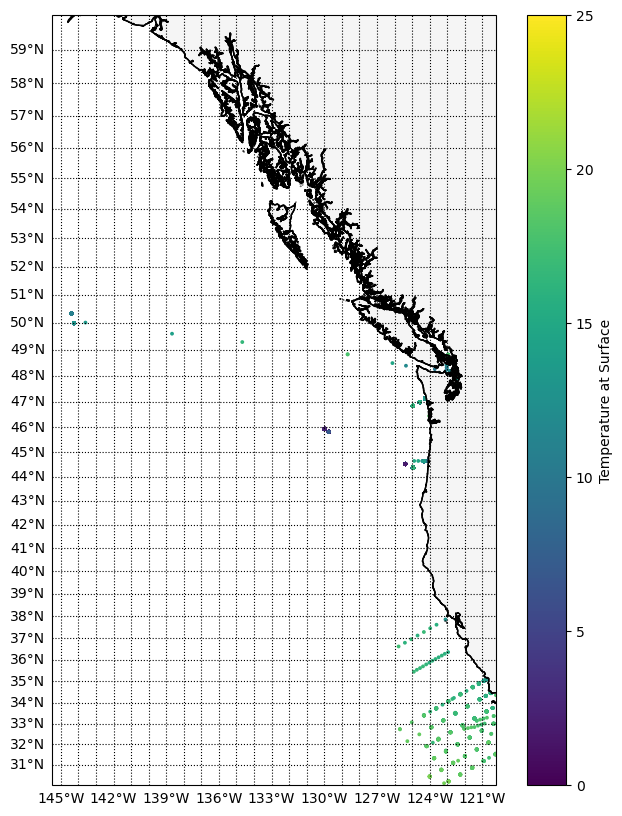

In [6]:
## August Temperature Map at 0m

inPlot = (-145.5 < lon) & (lon < -120.2) & (30 < lat) & (lat < 60)
selectObsPNW = dfObsPNW[inPlot]
selectObsPNW["month"] = pd.to_datetime(selectObsPNW["time"]).dt.month

at0mAug = (selectObsPNW['depth (m)'] == 0.0) & (selectObsPNW["month"] == 8)

temp0m = selectObsPNW['temperature (degC)'][at0mAug]
lon0m = selectObsPNW["longitude (degrees_east)"][at0mAug]
lat0m = selectObsPNW["latitude (degrees_north)"][at0mAug]

# Make plot area
xlim, ylim = [-145.5, -120.2], [30, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

sc = ax.scatter(lon0m, lat0m, transform=crs.PlateCarree(), c=temp0m, cmap='viridis', s=3, vmin=0, vmax=25)
# Add colorbar using the figure object, not the axes
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', label='Temperature at Surface')


# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False


/tmp/ipykernel_3544174/3776098164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectObsPNW['cast_id'] = selectObsPNW.groupby(['time', "longitude (degrees_east)", "latitude (degrees_north)"]).ngroup()
/tmp/ipykernel_3544174/3776098164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectObsPNW.sort_values(by=['cast_id', 'depth (m)'], inplace=True)


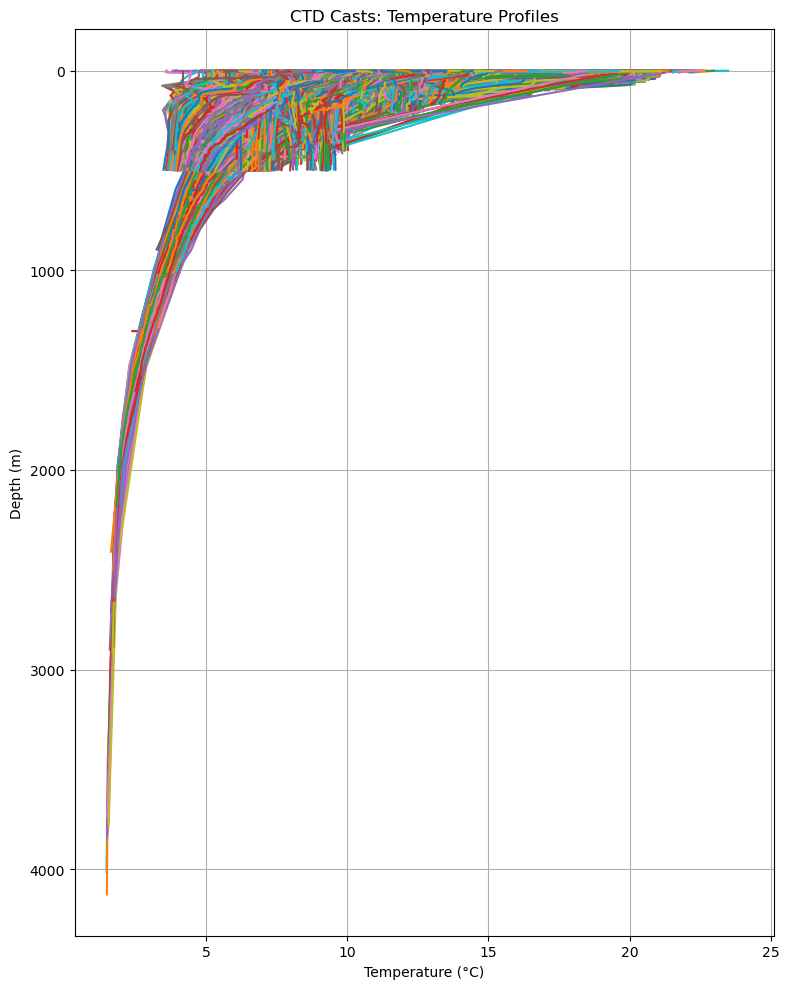

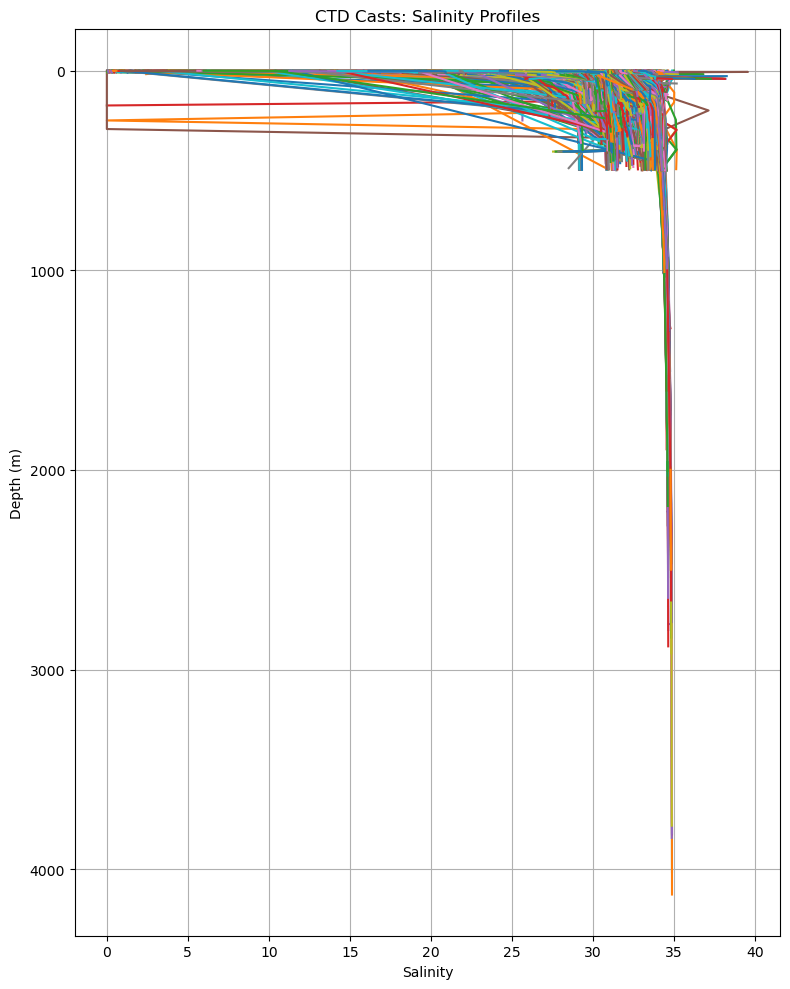

In [7]:
# Temperature Profiles
selectObsPNW['cast_id'] = selectObsPNW.groupby(['time', "longitude (degrees_east)", "latitude (degrees_north)"]).ngroup()
selectObsPNW.sort_values(by=['cast_id', 'depth (m)'], inplace=True)

# Plotting each cast
fig, ax = plt.subplots(figsize=(8, 10))

for cast_id, cast_df in selectObsPNW.groupby('cast_id'):
    ax.plot(cast_df['temperature (degC)'], cast_df['depth (m)'], label=f'Cast {cast_id}')

ax.invert_yaxis()
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Depth (m)')
ax.set_title('CTD Casts: Temperature Profiles')
ax.grid()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 10))

for cast_id, cast_df in selectObsPNW.groupby('cast_id'):
    ax.plot(cast_df['salinity (g kg-1)'], cast_df['depth (m)'], label=f'Cast {cast_id}')

ax.invert_yaxis()
ax.set_xlabel('Salinity')
ax.set_ylabel('Depth (m)')
ax.set_title('CTD Casts: Salinity Profiles')
ax.grid()

plt.tight_layout()
plt.show()
#render_mini_df(selectObsPNW[["cast_id", "time", "depth (m)"]], max_rows=50)

Notes and questions:
- How far back do we care about? I notice data from all the way back in the 1930s in the raw data
- The file includes data all the way outside the PNW area around the world. Is there a certain region or area selection that has been made that I should keep in mind to select the right PNW data?
- How should data from IOS bottles and CTD

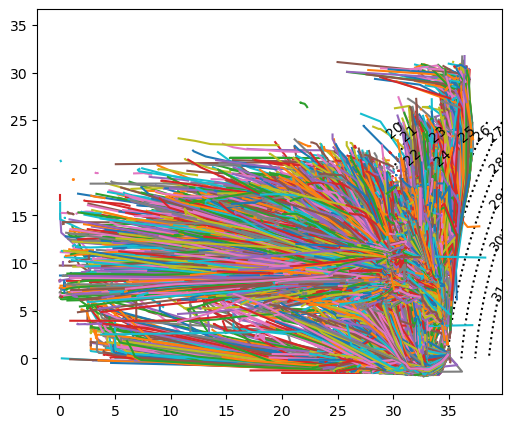

In [9]:
# TS Diagram

dfObsPNW['cast_id'] = dfObsPNW.groupby(['time', 'longitude (degrees_east)', 'latitude (degrees_north)']).ngroup()

# Setting up our grid and density contours
Temp = np.arange(0, 25, 0.2)
Sal = np.arange(30, 40, 0.2)
X,Y = np.meshgrid(Sal, Temp)
densZ = psu_tools.calculate_density(Y,X)-1000

fig, ax = plt.subplots(figsize=(6, 5))

cs = ax.contour(X,Y, densZ, levels=12, colors='k', linestyles='dotted')
ax.clabel(cs, cs.levels, fontsize=10)

for i in range(max(dfObsPNW['cast_id'])):

    cast_obs = dfObsPNW[dfObsPNW['cast_id'] == i]
    ax.plot(cast_obs['salinity (g kg-1)'], cast_obs['temperature (degC)'])

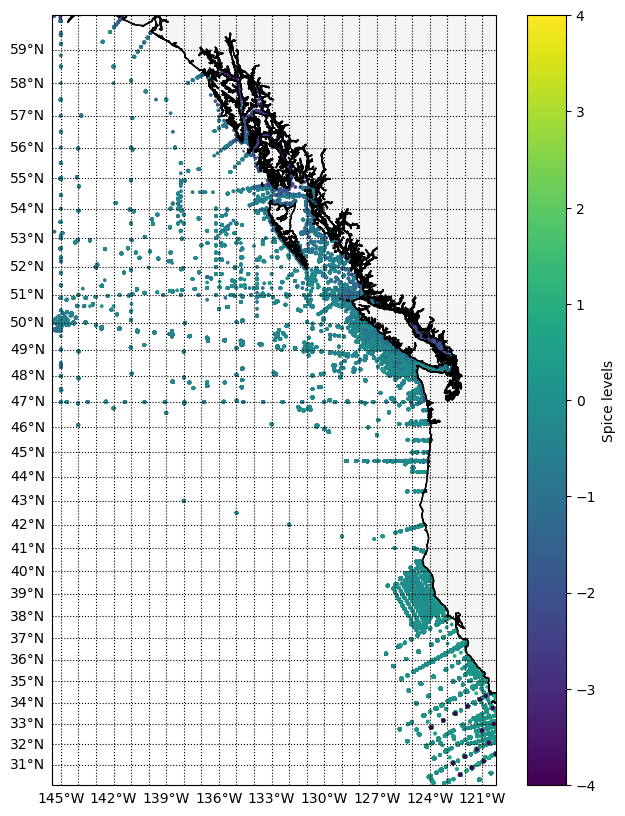

In [10]:
## Spice Levels

inPlot = (-145.5 < lon) & (lon < -120.2) & (30 < lat) & (lat < 60)
selectObsPNW = dfObsPNW[inPlot]

spice = selectObsPNW['spice']
lon = selectObsPNW["longitude (degrees_east)"]
lat = selectObsPNW["latitude (degrees_north)"]

# Make plot area
xlim, ylim = [-145.5, -120.2], [30, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

sc = ax.scatter(lon, lat, transform=crs.PlateCarree(), c=spice, cmap='viridis', s=3, vmin=-4, vmax=4)
# Add colorbar using the figure object, not the axes
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', label='Spice levels')

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False